# Plots

This `.ipynb` is used to draw pictures for the report of this assignment.

In [1]:
import xgboost as xgb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from utils.dataset import Dataset
from constants import CWD, TASK_A_DIR, TASK_B_DIR, TASK_A_DATA_ABS_PATH, TASK_B_DATA_ABS_PATH

In [3]:
import os
import json

In [4]:
TASK_A_MODEL_ABS_PATH = os.path.join(CWD, TASK_A_DIR, "task_a_training_model.json")
TASK_B_MODEL_ABS_PATH = os.path.join(CWD, TASK_B_DIR, "task_b_training_model.json")

In [5]:
dataset = Dataset(TASK_A_DATA_ABS_PATH)

In [6]:
classifier = xgb.XGBClassifier()
classifier.load_model(TASK_A_MODEL_ABS_PATH)

In [7]:
classifier.importance_type = "weight"
feature_importances = classifier.feature_importances_

In [8]:
feature_importances.size

784

In [9]:
28 * 28

784

In [10]:
# convert to 2D ndarray
feature_importances_2d = np.reshape(feature_importances, (28, 28))

In [11]:
feature_importances_2d.shape

(28, 28)

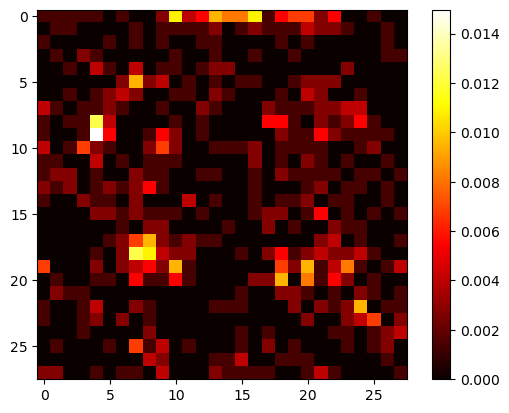

In [12]:
plt.imshow(feature_importances_2d, interpolation='none', cmap='hot')
plt.colorbar(orientation='vertical')
plt.show()

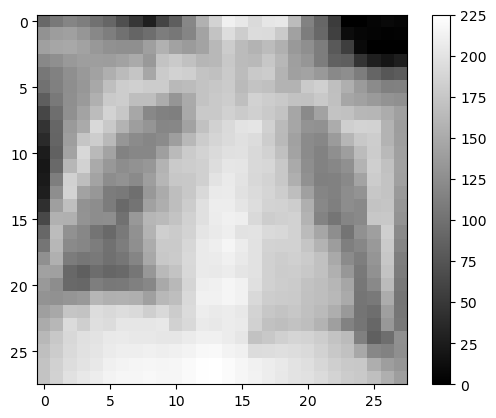

In [13]:
idx = 0
pneumonia_sample = dataset.X_train[idx]
assert dataset.y_train[idx] == 1
pneumonia_sample_2d = np.reshape(pneumonia_sample, (28, 28))
plt.imshow(pneumonia_sample_2d, interpolation='none', cmap='gray')
plt.colorbar(orientation='vertical')
plt.show()

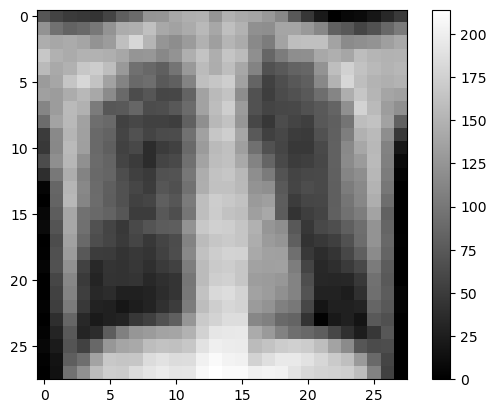

In [14]:
idx = 5
normal_sample = dataset.X_train[idx]
assert dataset.y_train[idx] == 0
normal_sample_2d = np.reshape(normal_sample, (28, 28))
plt.imshow(normal_sample_2d, interpolation='none', cmap='gray')
plt.colorbar(orientation='vertical')
plt.show()

## Learning Curves

In [15]:
TASK_A_EARLY_STOPPING_ROUNDS_NONE_EVALS_RESULT_ABS_PATH = os.path.join(CWD, TASK_A_DIR, "task_a_early_stopping_rounds_None_evals_result.json")
TASK_B_EARLY_STOPPING_ROUNDS_NONE_EVALS_RESULT_ABS_PATH = os.path.join(CWD, TASK_B_DIR, "task_b_early_stopping_rounds_None_evals_result.json")
TASK_A_EARLY_STOPPING_ROUNDS_3_EVALS_RESULT_ABS_PATH = os.path.join(CWD, TASK_A_DIR, "task_a_early_stopping_rounds_3_evals_result.json")
TASK_B_EARLY_STOPPING_ROUNDS_3_EVALS_RESULT_ABS_PATH = os.path.join(CWD, TASK_B_DIR, "task_b_early_stopping_rounds_3_evals_result.json")

In [16]:
with open(TASK_A_EARLY_STOPPING_ROUNDS_NONE_EVALS_RESULT_ABS_PATH, "r") as f:
    task_a_early_stopping_rounds_none_evals_result = json.load(f)
with open(TASK_A_EARLY_STOPPING_ROUNDS_3_EVALS_RESULT_ABS_PATH, "r") as f:
    task_a_early_stopping_rounds_3_evals_result = json.load(f)

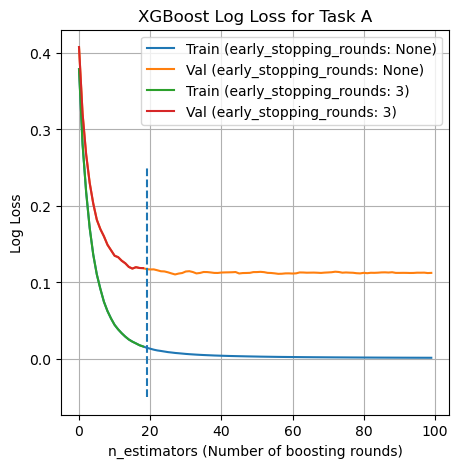

In [22]:
fig, ax = plt.subplots(figsize=(5, 5))

epochs = len(task_a_early_stopping_rounds_none_evals_result["validation_0"]["logloss"])
x_axis = range(0, epochs)
ax.plot(x_axis, task_a_early_stopping_rounds_none_evals_result["validation_0"]["logloss"], label="Train (early_stopping_rounds: None)")
ax.plot(x_axis, task_a_early_stopping_rounds_none_evals_result["validation_1"]["logloss"], label="Val (early_stopping_rounds: None)")

epochs = len(task_a_early_stopping_rounds_3_evals_result["validation_0"]["logloss"])
x_axis = range(0, epochs)
ax.plot(x_axis, task_a_early_stopping_rounds_3_evals_result["validation_0"]["logloss"], label="Train (early_stopping_rounds: 3)")
ax.plot(x_axis, task_a_early_stopping_rounds_3_evals_result["validation_1"]["logloss"], label="Val (early_stopping_rounds: 3)")
ax.vlines(x = epochs, ymin = -0.05, ymax = 0.25, linestyle='--')

ax.legend()
ax.grid()
ax.set_axisbelow(True)
plt.xlabel("n_estimators (Number of boosting rounds)")
plt.ylabel("Log Loss")
plt.title("XGBoost Log Loss for Task A")
plt.savefig('images/task_a_learning_curve.png')
plt.show()

In [23]:
with open(TASK_B_EARLY_STOPPING_ROUNDS_NONE_EVALS_RESULT_ABS_PATH, "r") as f:
    task_b_early_stopping_rounds_none_evals_result = json.load(f)
with open(TASK_B_EARLY_STOPPING_ROUNDS_3_EVALS_RESULT_ABS_PATH, "r") as f:
    task_b_early_stopping_rounds_3_evals_result = json.load(f)

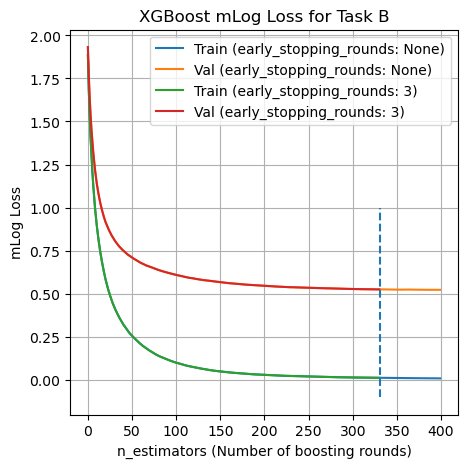

In [24]:
fig, ax = plt.subplots(figsize=(5, 5))

epochs = len(task_b_early_stopping_rounds_none_evals_result["validation_0"]["mlogloss"])
x_axis = range(0, epochs)
ax.plot(x_axis, task_b_early_stopping_rounds_none_evals_result["validation_0"]["mlogloss"], label="Train (early_stopping_rounds: None)")
ax.plot(x_axis, task_b_early_stopping_rounds_none_evals_result["validation_1"]["mlogloss"], label="Val (early_stopping_rounds: None)")

epochs = len(task_b_early_stopping_rounds_3_evals_result["validation_0"]["mlogloss"])
x_axis = range(0, epochs)
ax.plot(x_axis, task_b_early_stopping_rounds_3_evals_result["validation_0"]["mlogloss"], label="Train (early_stopping_rounds: 3)")
ax.plot(x_axis, task_b_early_stopping_rounds_3_evals_result["validation_1"]["mlogloss"], label="Val (early_stopping_rounds: 3)")
ax.vlines(x = epochs, ymin = -0.1, ymax = 1, linestyle='--')

ax.legend()
ax.grid()
ax.set_axisbelow(True)
plt.xlabel("n_estimators (Number of boosting rounds)")
plt.ylabel("mLog Loss")
plt.title("XGBoost mLog Loss for Task B")
plt.savefig('images/task_b_learning_curve.png')
plt.show()